# Linear regression

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


### This is new chapter

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras import Model

Let's create noisy data (100 points) in form of `m * X + b = Y`:

In [3]:
def make_noisy_data(w=0.1, b=0.3, n=100):
    x = tf.random.uniform(shape=(n, ))
    noise = tf.random.normal(shape=(len(x), ), stddev=0.01)
    y = w * x + b + noise
    return x, y

In [4]:
X, Y = make_noisy_data()

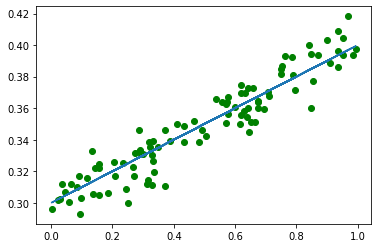

In [5]:
plt.plot(X, Y, 'go')
plt.plot(X, 0.1*X+0.3)

In [6]:
X

<tf.Tensor: id=6, shape=(100,), dtype=float32, numpy=
array([0.8490797 , 0.7506132 , 0.02202487, 0.96727264, 0.33296466,
       0.33438945, 0.3708104 , 0.6741303 , 0.5713177 , 0.3149674 ,
       0.13342822, 0.14292073, 0.18678606, 0.06619406, 0.04662526,
       0.09795821, 0.61988425, 0.26945746, 0.31218827, 0.15566063,
       0.64496374, 0.6308148 , 0.90157163, 0.0919739 , 0.8470999 ,
       0.20484602, 0.6656723 , 0.329718  , 0.23347282, 0.30107903,
       0.9837605 , 0.15567195, 0.02863622, 0.43354213, 0.93667984,
       0.57057023, 0.28639734, 0.85367167, 0.618099  , 0.95271075,
       0.3481549 , 0.13579345, 0.577101  , 0.79488206, 0.00116992,
       0.6534786 , 0.57731915, 0.08553541, 0.20880473, 0.53710234,
       0.26567543, 0.90862095, 0.11820567, 0.711056  , 0.57288885,
       0.4670428 , 0.3305565 , 0.95314443, 0.37264574, 0.7896638 ,
       0.75389135, 0.25036943, 0.43309212, 0.70822895, 0.65810525,
       0.24504614, 0.93700457, 0.38703322, 0.6426139 , 0.15722871,
       0

(array([19., 25., 14., 27., 15.]),
 array([0.00116992, 0.19980581, 0.3984417 , 0.5970776 , 0.7957135 ,
        0.99434936], dtype=float32),
 <a list of 5 Patch objects>)

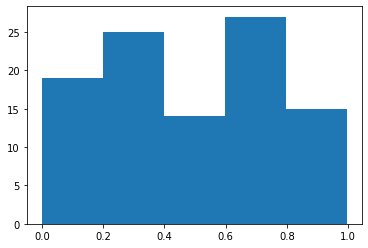

In [7]:
plt.hist(X, bins=5)

In [8]:
w = tf.Variable(0.)
b = tf.Variable(0.)

In [9]:
def predict(x):
    y = w * x + b
    return y

In [10]:
def mean_squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [34]:
loss = mean_squared_error(predict(X), Y)
print("Starting loss", loss.numpy())

Starting loss 0.00010253302
Minimum loss 0.000104527324


In [12]:
learning_rate = 0.05
steps = 200

for i in range(steps):

    with tf.GradientTape() as tape:
        predictions = predict(X)
        loss = mean_squared_error(predictions, Y)

    gradients = tape.gradient(loss, [w, b])

    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

    if i % 20 == 0:
        print("Step %d, Loss %f" % (i, loss.numpy()))

Step 0, Loss 0.122248
Step 20, Loss 0.000774
Step 40, Loss 0.000178
Step 60, Loss 0.000159
Step 80, Loss 0.000147
Step 100, Loss 0.000137
Step 120, Loss 0.000129
Step 140, Loss 0.000123
Step 160, Loss 0.000119
Step 180, Loss 0.000115


In [14]:
print("After {} steps we learned that w={} and b={}".format(steps, w.numpy(), b.numpy()))

After 200 steps we learned that w=0.11590876430273056 and b=0.2914946973323822


In [20]:
print(w.numpy(), b.numpy())

0.115908764 0.2914947


In [21]:
w.numpy(), b.numpy()

(0.115908764, 0.2914947)

In [22]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.115908764>

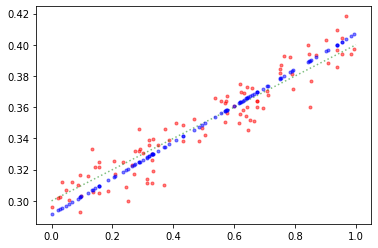

In [27]:
plt.plot(X, Y, 'r.', alpha=0.5)
plt.plot([0,1], [0.1*0+0.3, 0.1*1+0.3], 'g:', alpha=0.5)
plt.plot(X, predict(X), 'b.', alpha=0.5)

Step 0, Loss 0.000103
Step 20, Loss 0.000103
Step 40, Loss 0.000103
Step 60, Loss 0.000103
Step 80, Loss 0.000103
Step 100, Loss 0.000103
Step 120, Loss 0.000103
Step 140, Loss 0.000103
Step 160, Loss 0.000103
Step 180, Loss 0.000103


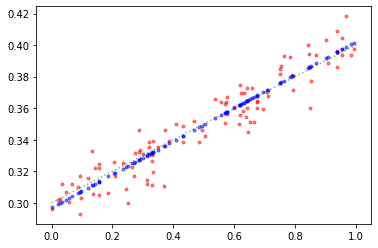

In [33]:
learning_rate = 0.01
steps = 200

for i in range(steps):

    with tf.GradientTape() as tape:
        predictions = predict(X)
        loss = mean_squared_error(predictions, Y)

    gradients = tape.gradient(loss, [w, b])

    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

    if i % 20 == 0:
        print("Step %d, Loss %f" % (i, loss.numpy()))
        
plt.plot(X, Y, 'r.', alpha=0.5)
plt.plot([0,1], [0.1*0+0.3, 0.1*1+0.3], 'g:', alpha=0.5)
plt.plot(X, predict(X), 'b.', alpha=0.5)

In [35]:
min_loss = mean_squared_error(0.1*X+0.3, Y)
print("Minimum loss", min_loss.numpy())

Minimum loss 0.000104527324


In [36]:
gradients

[<tf.Tensor: id=53134, shape=(), dtype=float32, numpy=4.0876846e-05>,
 <tf.Tensor: id=53127, shape=(), dtype=float32, numpy=-2.199519e-05>]

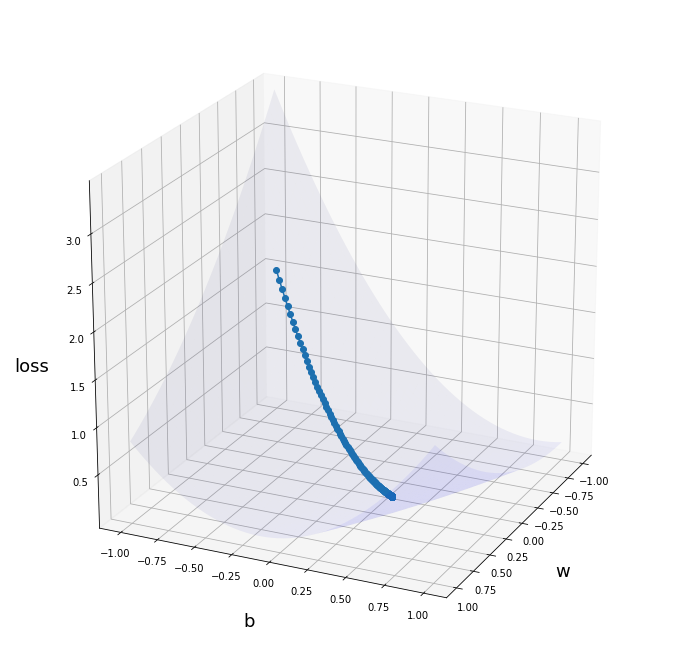

In [48]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ws = np.linspace(-1, 1)
bs = np.linspace(-1, 1)
w_mesh, b_mesh = np.meshgrid(ws, bs)


def loss_for_values(w, b):
    y = w * X + b
    loss = mean_squared_error(y, Y)
    return loss


zs = np.array([
    loss_for_values(w, b) for (w, b) in zip(np.ravel(w_mesh), np.ravel(b_mesh))
])
z_mesh = zs.reshape(w_mesh.shape)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_mesh, b_mesh, z_mesh, color='b', alpha=0.06)

w = tf.Variable(-.5)
b = tf.Variable(-.75)

history = []

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = predict(X)
        loss = mean_squared_error(predictions, Y)
    gradients = tape.gradient(loss, [w, b])
    history.append((w.numpy(), b.numpy(), loss.numpy()))
    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

# Plot the trajectory
ax.plot([h[0] for h in history], [h[1] for h in history],
        [h[2] for h in history],
        marker='o')

ax.set_xlabel('w', fontsize=18, labelpad=20)
ax.set_ylabel('b', fontsize=18, labelpad=20)
ax.set_zlabel('loss', fontsize=18, labelpad=20)

ax.view_init(elev=22, azim=25)
plt.show()